In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

Text(0, 0.5, 'Y')

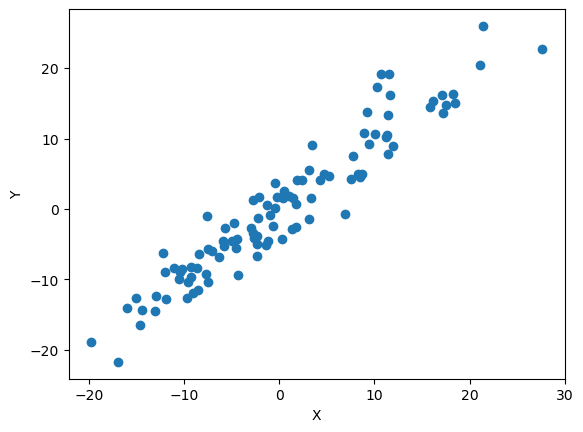

In [24]:
torch.manual_seed(2)

# create dummy data for training
x_train = torch.randn(100, 1) * 10
y_train = x_train + 3 * torch.randn(100, 1)

x_train = x_train.numpy()
y_train = y_train.numpy()

inputs = Variable(torch.from_numpy(x_train))
labels = Variable(torch.from_numpy(y_train))

plt.plot(x_train, y_train, 'o')             # plot the new X,Y 
plt.xlabel('X')
plt.ylabel('Y')

In [13]:
class LR(torch.nn.Module):

  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = torch.nn.Linear(input_size, output_size)

  def forward(self, x):    
    return self.linear(x)    
    
  def get_parameters(self):
    (w, b) = self.parameters()

    return (w[0][0].item(), b[0].item()) 

In [41]:
input_dim = 1        # takes variable 'x' 
output_dim = 1       # takes variable 'y'
learning_rate = 0.01 
epochs = 100

model = LR(input_dim, output_dim) 
   
if torch.cuda.is_available():
    model.cuda()

In [40]:
def plot_fit(model: LR, title: str):
  plt.title(title)

  w, b = model.get_parameters()
  print(w, b)
  x1 = np.array([-30, 30])

  y1 = w * x1 + b

  plt.plot(x1, y1, 'r')
  plt.scatter(x_train, y_train)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

0.26434898376464844 -0.05657529830932617


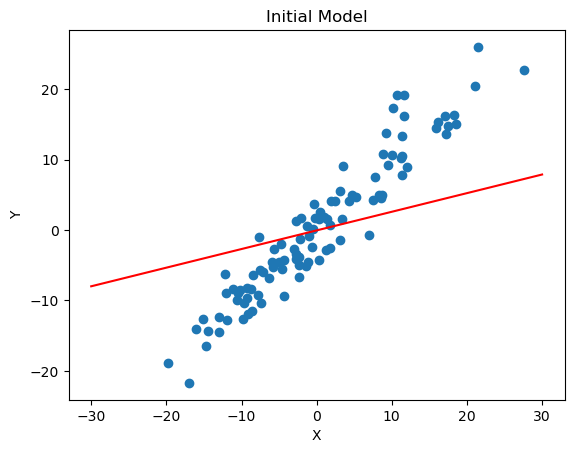

In [17]:
plot_fit(model, 'Initial Model')

In [42]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [43]:
losses = []

for epoch in range(epochs):  
  # inputs = Variable(torch.from_numpy(x_train))
  # labels = Variable(torch.from_numpy(y_train))

  # clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
  optimizer.zero_grad()

  # get output from the model, given the inputs
  outputs = model(inputs)

  # get loss for the predicted output
  loss = criterion(outputs, labels)

  # add the lost for plotting
  losses.append(loss.item())

  # get gradients w.r.t to parameters
  loss.backward()

  # update parameters
  optimizer.step()

  print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 184.4272003173828
epoch 1, loss 173.07200622558594
epoch 2, loss 162.45265197753906
epoch 3, loss 152.52163696289062
epoch 4, loss 143.2339630126953
epoch 5, loss 134.5481414794922
epoch 6, loss 126.42520141601562
epoch 7, loss 118.82862091064453
epoch 8, loss 111.72437286376953
epoch 9, loss 105.08050537109375
epoch 10, loss 98.86707305908203
epoch 11, loss 93.05624389648438
epoch 12, loss 87.6220703125
epoch 13, loss 82.5400390625
epoch 14, loss 77.7872543334961
epoch 15, loss 73.34257507324219
epoch 16, loss 69.1859359741211
epoch 17, loss 65.29852294921875
epoch 18, loss 61.66313552856445
epoch 19, loss 58.2631721496582
epoch 20, loss 55.083587646484375
epoch 21, loss 52.110042572021484
epoch 22, loss 49.329185485839844
epoch 23, loss 46.7285270690918
epoch 24, loss 44.296417236328125
epoch 25, loss 42.02186965942383
epoch 26, loss 39.89472579956055
epoch 27, loss 37.90541458129883
epoch 28, loss 36.045047760009766
epoch 29, loss 34.30518341064453
epoch 30, loss 32.67

Text(0.5, 0, 'epoch')

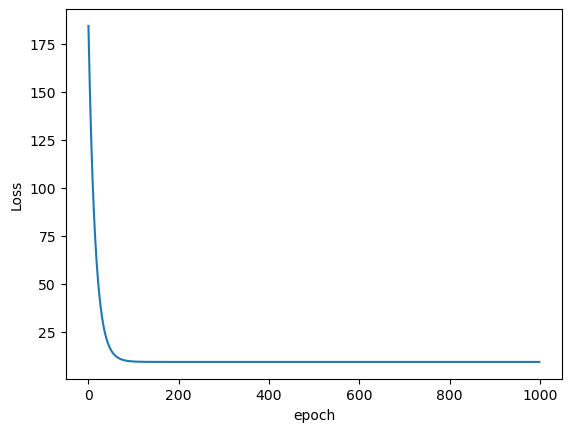

In [44]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

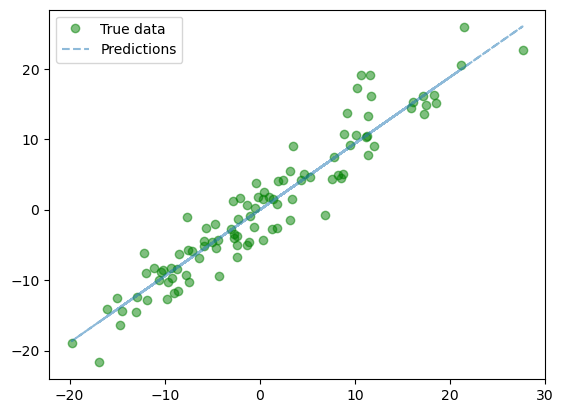

In [21]:
with torch.no_grad(): # we don't need gradients in the testing phase
  if torch.cuda.is_available():
    predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
  else:
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()


Text(0.5, 0, 'epoch')

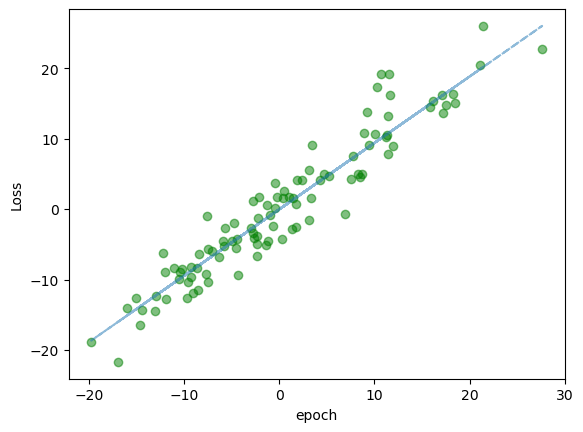

In [22]:
import matplotlib.pyplot as plt

plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')